In [1]:
# this notebook contains basics of Neural Networks and Deep Learning


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Shallow and Deep Networks

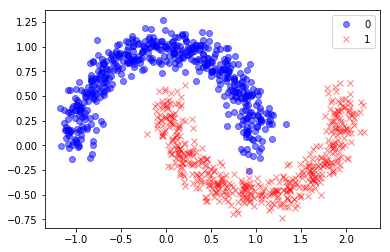

In [3]:
# importing a inbuild dataset

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [4]:
# as we see the data is inseparable by use of a line.

X.shape

(1000, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam # SGD is stochastic gradient decent(Optimizers)

# SHALLOW MODEL

In [10]:
# creating a logistic regression model

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
700/700 [==============================] - 0s 408us/step - loss: 0.3473 - acc: 0.8386
Epoch 2/200
700/700 [==============================] - 0s 30us/step - loss: 0.2905 - acc: 0.8614
Epoch 3/200
700/700 [==============================] - 0s 23us/step - loss: 0.2645 - acc: 0.8757
Epoch 4/200
700/700 [==============================] - 0s 27us/step - loss: 0.2499 - acc: 0.8800
Epoch 5/200
700/700 [==============================] - 0s 21us/step - loss: 0.2398 - acc: 0.8843
Epoch 6/200
700/700 [==============================] - 0s 22us/step - loss: 0.2348 - acc: 0.8857
Epoch 7/200
700/700 [==============================] - 0s 22us/step - loss: 0.2314 - acc: 0.8843
Epoch 8/200
700/700 [==============================] - 0s 22us/step - loss: 0.2290 - acc: 0.8886
Epoch 9/200
700/700 [==============================] - 0s 45us/step - loss: 0.2281 - acc: 0.8886
Epoch 10/200
700/700 [==============================] - 0s 41us/step - loss: 0.2292 - acc: 0.8886
Epoch 11/200
700/700 [======

700/700 [==============================] - 0s 41us/step - loss: 0.2239 - acc: 0.8871
Epoch 85/200
700/700 [==============================] - 0s 38us/step - loss: 0.2243 - acc: 0.8900
Epoch 86/200
700/700 [==============================] - 0s 40us/step - loss: 0.2243 - acc: 0.8871
Epoch 87/200
700/700 [==============================] - 0s 43us/step - loss: 0.2240 - acc: 0.8886
Epoch 88/200
700/700 [==============================] - 0s 48us/step - loss: 0.2248 - acc: 0.8900
Epoch 89/200
700/700 [==============================] - 0s 44us/step - loss: 0.2247 - acc: 0.8886
Epoch 90/200
700/700 [==============================] - 0s 44us/step - loss: 0.2241 - acc: 0.8871
Epoch 91/200
700/700 [==============================] - 0s 44us/step - loss: 0.2243 - acc: 0.8886
Epoch 92/200
700/700 [==============================] - 0s 48us/step - loss: 0.2244 - acc: 0.8871
Epoch 93/200
700/700 [==============================] - 0s 51us/step - loss: 0.2249 - acc: 0.8914
Epoch 94/200
700/700 [===========

Epoch 167/200
700/700 [==============================] - 0s 34us/step - loss: 0.2251 - acc: 0.8886
Epoch 168/200
700/700 [==============================] - 0s 38us/step - loss: 0.2242 - acc: 0.8886
Epoch 169/200
700/700 [==============================] - 0s 46us/step - loss: 0.2246 - acc: 0.8871
Epoch 170/200
700/700 [==============================] - 0s 43us/step - loss: 0.2252 - acc: 0.8857
Epoch 171/200
700/700 [==============================] - 0s 51us/step - loss: 0.2252 - acc: 0.8886
Epoch 172/200
700/700 [==============================] - 0s 50us/step - loss: 0.2248 - acc: 0.8871
Epoch 173/200
700/700 [==============================] - 0s 43us/step - loss: 0.2246 - acc: 0.8886
Epoch 174/200
700/700 [==============================] - 0s 46us/step - loss: 0.2246 - acc: 0.8857
Epoch 175/200
700/700 [==============================] - 0s 46us/step - loss: 0.2241 - acc: 0.8886
Epoch 176/200
700/700 [==============================] - 0s 41us/step - loss: 0.2243 - acc: 0.8886
Epoch 177/

In [12]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 160us/step


In [13]:
results

# 1st refers to 'binary_crossentropy' while 2nd refers to metrics=['accuracy']
# we prefer 2nd result

[0.31790712575117747, 0.8400000007947286]

In [14]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.840


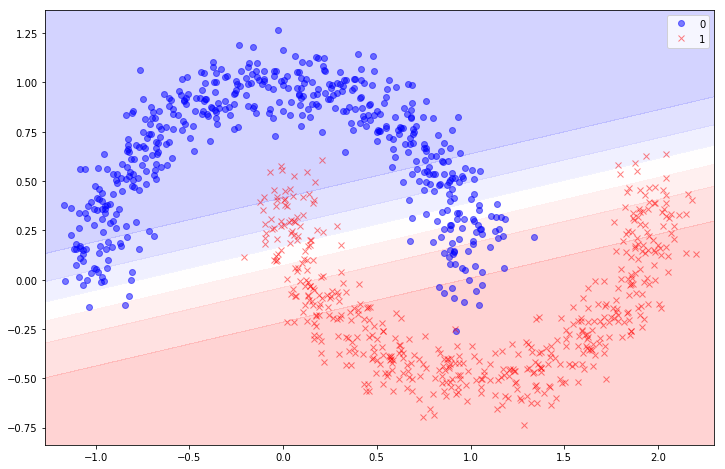

In [15]:
# plotting decision boundary

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

**but this is of no great use as it does not fit the data properly**

# THUS WE NEED A DEEPER MODEL



# DEEP MODEL

**In this we work by stacking layers so functions in order to make the model deep **

In [21]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh')) # input = 2 features and 4 nodes in 1st layer
model.add(Dense(2, activation='tanh')) # 2 nodes in 2nd layer layers
model.add(Dense(1, activation='sigmoid')) # and 1 node as output 
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=200,verbose =0)

In [23]:
model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 469us/step


[0.0013538545855165769, 1.0]

In [24]:
# On evaluating we get accuracy =1 

from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


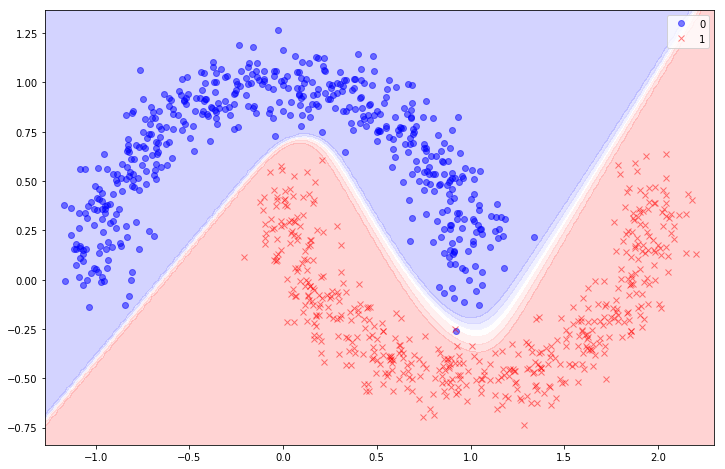

In [26]:
plot_decision_boundary(model, X, y)

In [ ]:
# this plot is much better division between the two datapoints